# Table of Contents
 <p><div class="lev1"><a href="#Hidden-Markov-Model----SP500-prediction"><span class="toc-item-num">1&nbsp;&nbsp;</span>Hidden Markov Model -- SP500 prediction</a></div>

In [1]:
import numpy as np
import scipy as sp
from markov_models import *
%pylab inline
import pandas as pd
from pandas_datareader import data
import datetime

Populating the interactive namespace from numpy and matplotlib


# Hidden Markov Model -- SP500 prediction

In [2]:
# style.use("seaborn-poster")

In [3]:
symbol = 'SPX'
data_source='morningstar'
start_date = datetime.datetime(2015,1,1)
end_date = datetime.datetime(2018,5,24)

df = data.DataReader(symbol, data_source, start_date, end_date)

In [4]:
df = df.dropna()
df.index = pd.MultiIndex.droplevel(df.index)

In [5]:
t_ = df.index[1:]
r_ = np.diff(np.log(df.Close))

In [6]:
t_train = 500
l_ = np.array([0]*t_train + [1]*(r_.size-t_train))
r_train = r_[:t_train]
r_test = r_[t_train:]

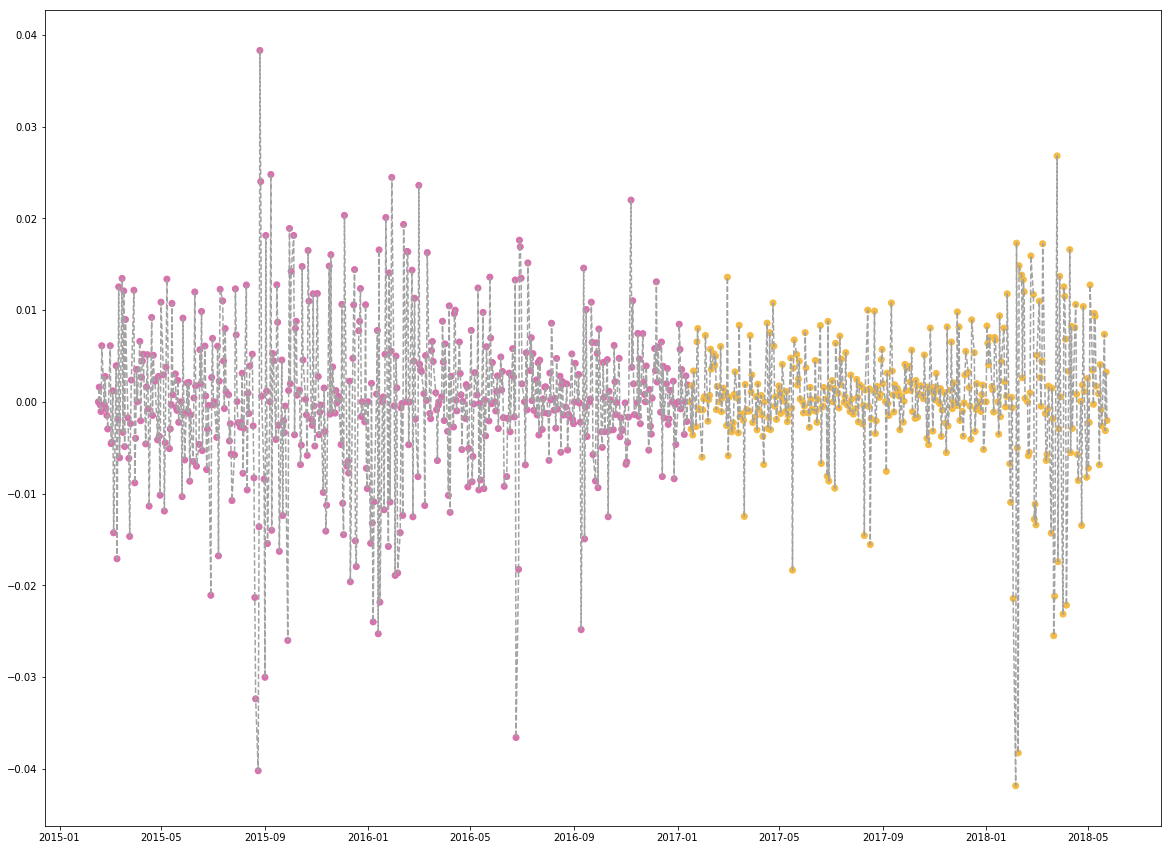

In [7]:
figure(figsize=(20,15))
plot(t_, r_, '--', c=cc_[-1])
scatter(t_, r_, c=cc_[l_*9])

In [11]:
n_hidden = 5
p_i = np.random.uniform(size=n_hidden); p_i /=p_i.sum()
a_i = np.random.uniform(size=(n_hidden,n_hidden)); a_i /= a_i.sum(axis=1)[:,None]
print(a_i.sum(axis=1), p_i.sum())
param = {"initial": p_i, "transition": a_i, "emission": {'type': 'normal', 'mean': np.linspace(-1,1,n_hidden), 'variance': [1]*n_hidden}}
hmm = HiddenMarkovModel(param, max_iter=1000, eps=1e-6)

[1. 1. 1. 1. 1.] 1.0


In [12]:
hmm.fit(r_train)

EM converged within 109 steps


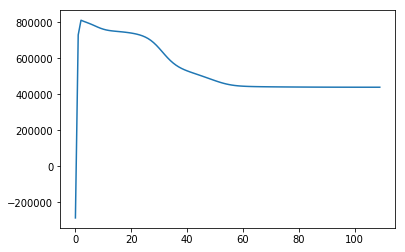

In [13]:
plot(hmm._Q_)

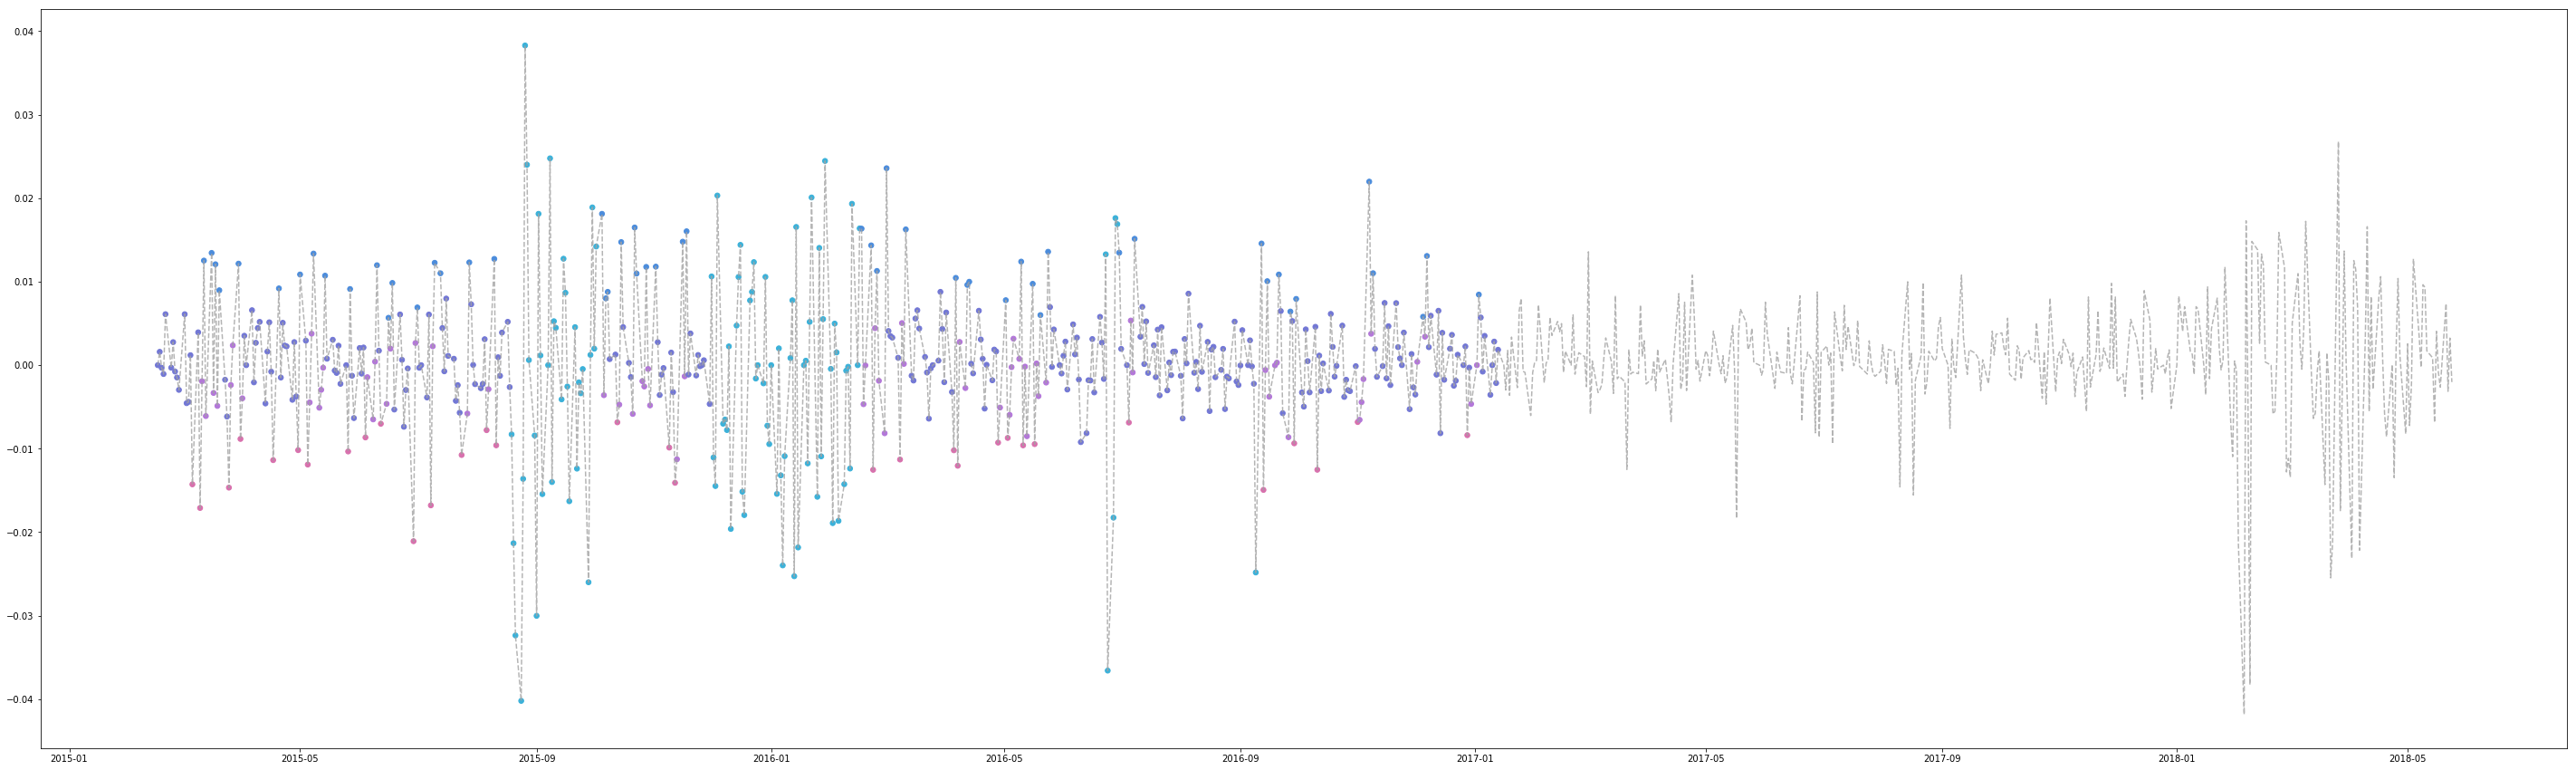

In [14]:
z_ = []
for p1 in hmm.posterior1:
    z_.append(np.argmax(p1))
z_ = np.array(z_)
figure(figsize=(50,15))
plot(t_, r_, '--', c=cc_[-1], alpha=0.8)
scatter(t_[:t_train], r_train, c=cc_[z_], s=30)

In [15]:
hmm.export_params()

{'initial': array([5.82878140e-143, 1.25266249e-115, 1.00000000e+000, 2.44918021e-155,
        1.54324486e-286]),
 'transition': array([[1.14775488e-05, 6.58534980e-01, 1.35936297e-01, 2.05446423e-01,
         7.08223204e-05],
        [1.26148789e-02, 4.30728422e-01, 5.49721020e-05, 5.56601727e-01,
         3.46439548e-12],
        [1.00744137e-01, 8.09289143e-07, 8.79458280e-01, 1.84592748e-08,
         1.97967544e-02],
        [1.66620985e-01, 3.01492647e-01, 4.26862824e-01, 1.05023544e-01,
         5.79975387e-19],
        [1.53168227e-29, 5.98187128e-12, 1.09568356e-31, 4.65903252e-02,
         9.53409675e-01]]),
 'emission': {'type': 'normal',
  'mean': array([-0.01003136, -0.00162118,  0.00049904,  0.01108211, -0.00203399]),
  'variance': array([1.88867682e-05, 1.41486678e-05, 1.32286750e-05, 1.80976616e-05,
         2.12423441e-04])}}

In [16]:
def predict_plot(days, hmm_obj, r_test=None):
    x,y = hmm_obj.get_forcast_probability(days, n_sig=6)
    x *= 100
    fill_between(x[x<=0], 0, y[x<=0], color=cc_[-3])
    fill_between(x[x>0], 0, y[x>0], color=cc_[5])
    
    mean = hmm_obj.predict_observation(days, "mean")
    mode = hmm_obj.predict_observation(days, "mode")
    if r_test is not None:
        axvline(r_test[days]*100, ls = '-', color=cc_[-1], label="actual")
    axvline(mean*100, ls = '--', color='w', label="forcast: mean")
    axvline(mode*100, ls = ':', color=cc_[-1], label="forcast: mode")
    xlim(-10,10)
    ylim(0, y.max()*1.25)
    xlabel("log return %")
    legend(loc=0)

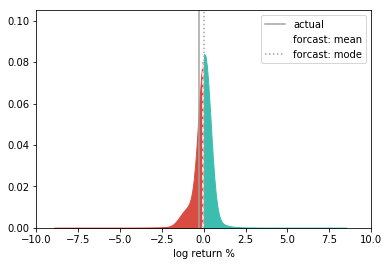

In [17]:
predict_plot(1, hmm, r_test)

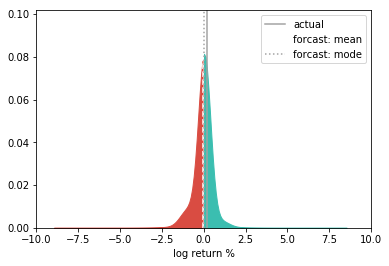

In [18]:
predict_plot(2, hmm, r_test)

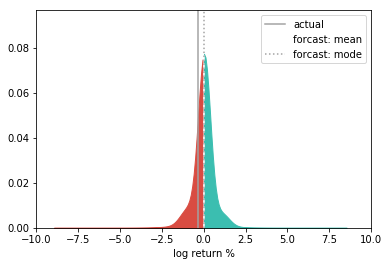

In [19]:
predict_plot(3, hmm, r_test)

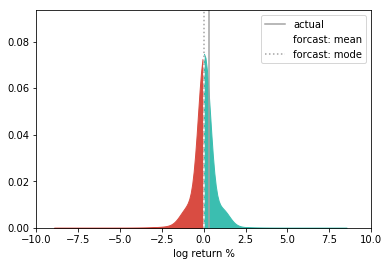

In [20]:
predict_plot(4, hmm, r_test)

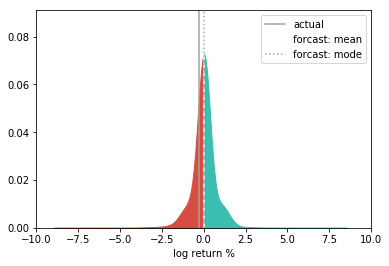

In [21]:
predict_plot(5, hmm, r_test)

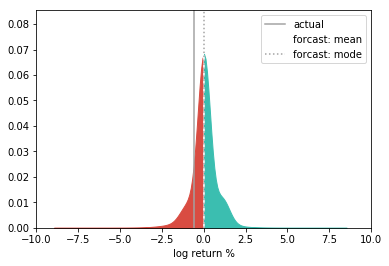

In [22]:
predict_plot(10, hmm, r_test)

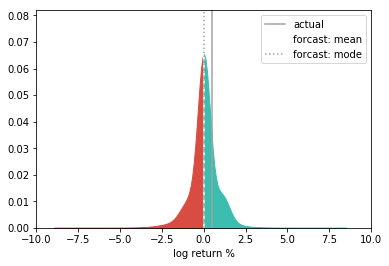

In [23]:
predict_plot(20, hmm, r_test)

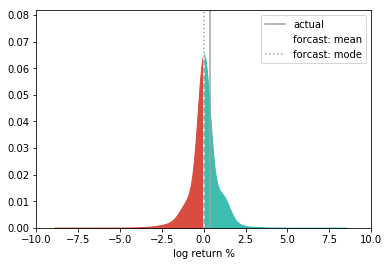

In [24]:
predict_plot(21, hmm, r_test)

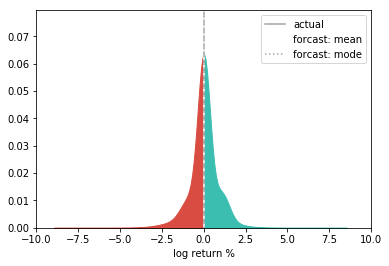

In [25]:
predict_plot(40, hmm, r_test)

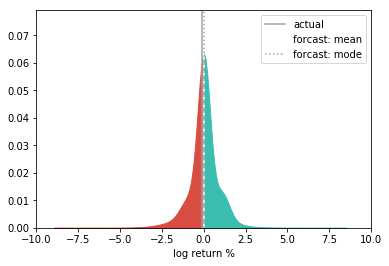

In [26]:
predict_plot(50, hmm, r_test)

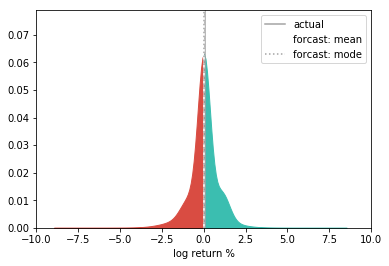

In [27]:
predict_plot(60, hmm, r_test)

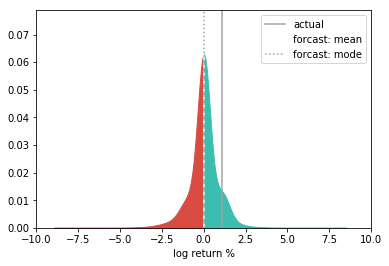

In [28]:
predict_plot(70, hmm, r_test)

[1. 1. 1. 1. 1.] 1.0
EM converged within 522 steps


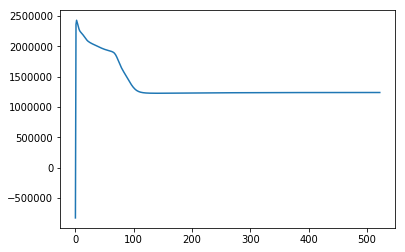

In [31]:
n_hidden = 5
p_i = np.random.uniform(size=n_hidden).round(5); p_i /=p_i.sum()
a_i = np.random.uniform(size=(n_hidden,n_hidden)).round(5); a_i /= a_i.sum(axis=1)[:,None]
print(a_i.sum(axis=1), p_i.sum())
param = {"initial": p_i, "transition": a_i, "emission": {'type': 'normal', 'mean': np.linspace(-1,1,n_hidden), 'variance': [1]*n_hidden}}
hmm = HiddenMarkovModel(param, max_iter=1000)
hmm.fit(r_)
plot(hmm._Q_)

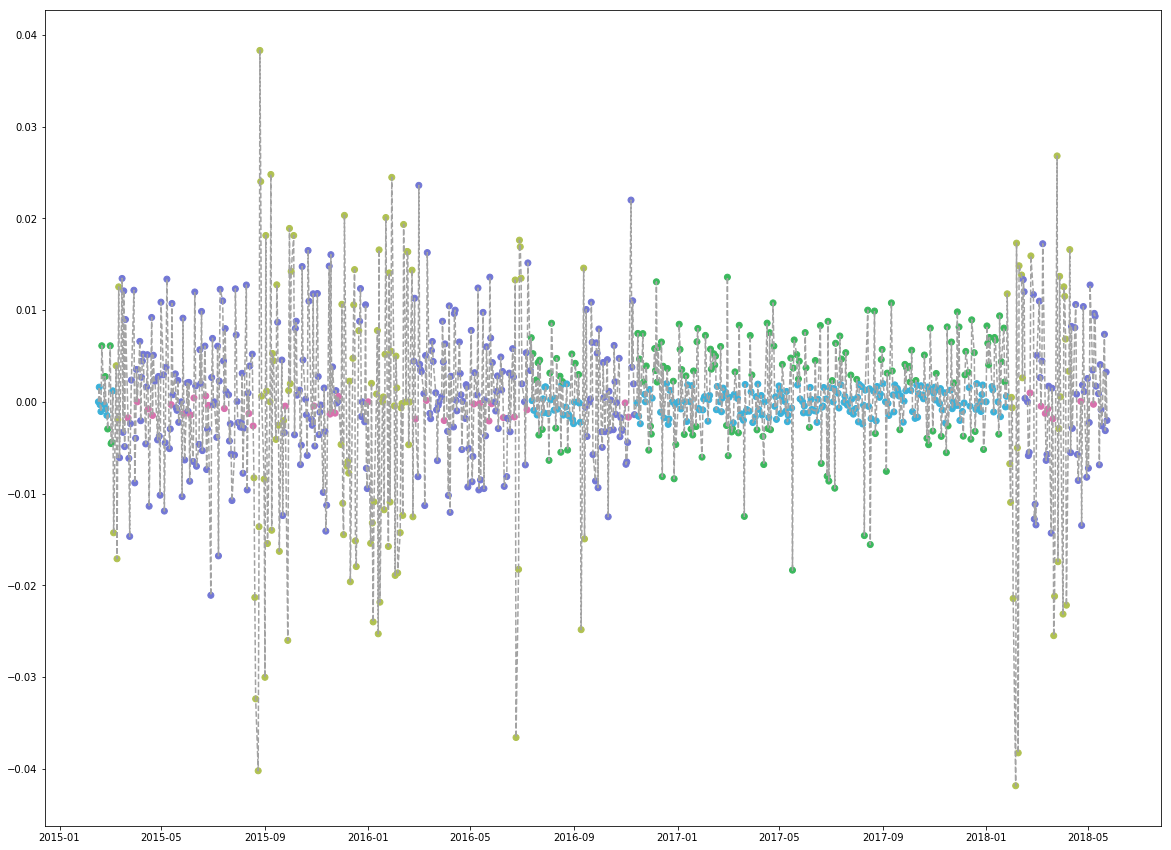

In [32]:
z_ = []
for p1 in hmm.posterior1:
    z_.append(np.argmax(p1))
z_ = np.array(z_)
figure(figsize=(20,15))
plot(t_, r_, '--', c=cc_[-1])
scatter(t_, r_, c=cc_[z_*2])

In [33]:
print(hmm.export_params())

{'initial': array([1.82139788e-246, 0.00000000e+000, 1.00000000e+000, 3.37502444e-273,
       0.00000000e+000]), 'transition': array([[5.65369634e-002, 8.14910349e-001, 4.38520750e-077,
        2.83734331e-003, 1.25715344e-001],
       [2.17578052e-001, 7.73460841e-001, 6.75320676e-022,
        8.96110639e-003, 2.04473632e-036],
       [4.10978396e-004, 2.14256503e-043, 4.22240791e-001,
        5.55515176e-001, 2.18330546e-002],
       [4.56653186e-027, 2.08950782e-040, 4.33753232e-001,
        5.66246768e-001, 3.15637353e-060],
       [1.27165882e-019, 8.75489537e-002, 3.07356345e-106,
        8.07332013e-049, 9.12451046e-001]]), 'emission': {'type': 'normal', 'mean': array([-0.0006947 ,  0.00105315, -0.00010823,  0.00144728, -0.00209183]), 'variance': array([2.57359924e-06, 5.67117391e-05, 2.44086801e-06, 2.66290059e-05,
       2.36288179e-04])}}


In [43]:
print(hmm.predict_observation(1, 'mode'), hmm.predict_observation(1, 'mean'))

-0.00046969131324311325 0.0006126780185368719


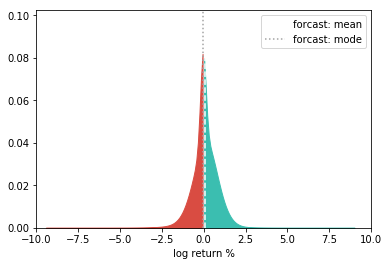

In [35]:
predict_plot(1, hmm)

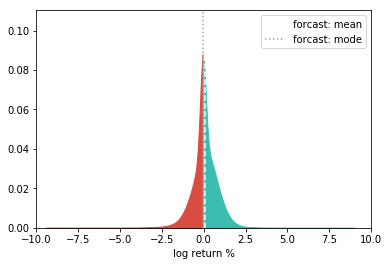

In [36]:
predict_plot(2, hmm)

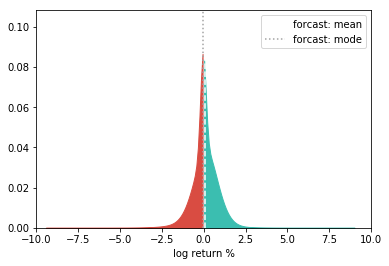

In [37]:
predict_plot(3, hmm)

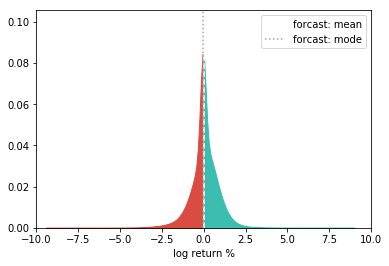

In [38]:
predict_plot(10, hmm)

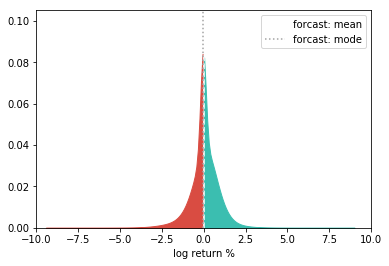

In [39]:
predict_plot(20, hmm)

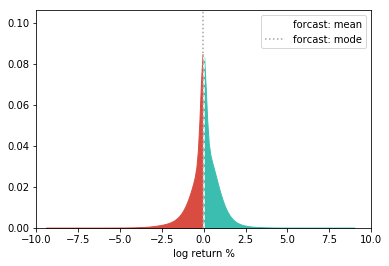

In [40]:
predict_plot(30, hmm)

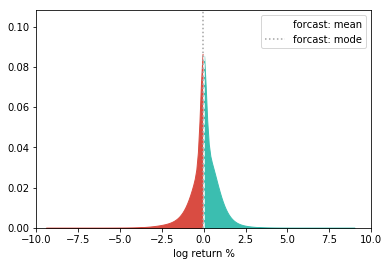

In [41]:
predict_plot(50, hmm)